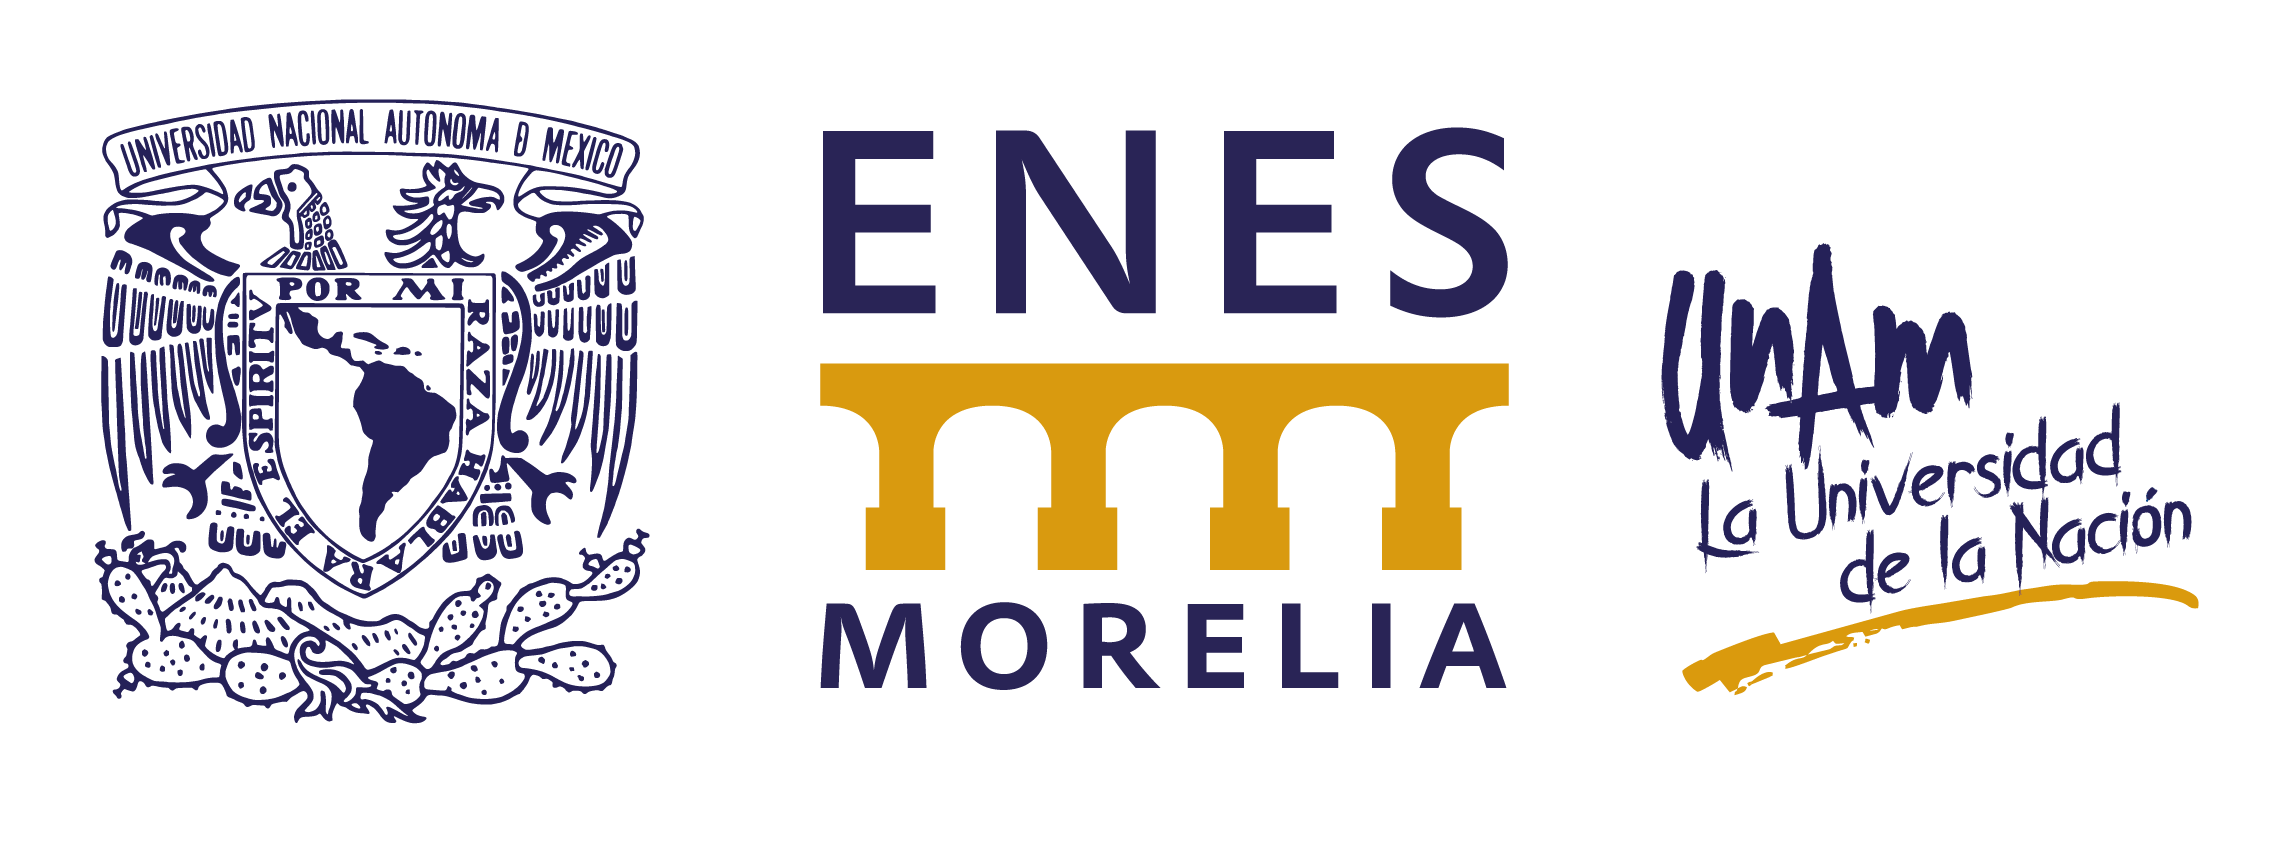

## Tecnologías para la información en Ciencias
## Procesamiento Digital de Imágenes
## Filtrado Frecuencial
### Arely Hilda Luis Tiburcio


# Objetivos

Desarrollar individualmente un programa que elimine ruido de imágenes, utilizando filtrado en el dominio de la frecuencia.

Con base en el espectro de Fourier en 2D su programa debe
eliminar el ruido periódico de las imágenes. El programa debe recibir como
entrada la imagen ruidosa y debe devolver la imagen filtrada. Deberán
probar (y debe funcionar correctamente) su desarrollo con las 5 imágenes
que se anexan a la tarea. Por supuesto, la función que realice el proceso
deberá recibir los parámetros necesarios (indicados manualmente) que
permitan configurar el procesamiento correcto para cada imagen.

# Conceptos

**Dominio espacial** .-Se refiere a la imagen en sí misma. Los métodos en esta categoría
están basados en la manipulación directa de los píxeles de la imagen.

**Dominio de la frecuencia** .- El procesamiento de la imagen se lleva a cabo en una transformada
de la imagen (Transformada de Fourier) y, posteriormente,
mediante la transformada inversa se obtienen los resultados.

**Filtros en el dominio de la frecuencia** .-  Se usan, principalmente, para
eliminar altas o bajas frecuencias de la imagen, lo que se traduce en
suavizar la imagen, o bien, realzar o detectar bordes.

## Procesamiento en el dominio de la frecuencia

**Pasos a seguir** :
- Se transforma la imagen en su dominio de la frecuencia mediante la
Transformada Discreta de Fourier, F(u,v).
- Se multiplica por un filtro de frecuencia H(u,v):
 G(u,v) = F(u,v) * H(u,v)
- Se calcula la inversa de la TDF a G(u,v).

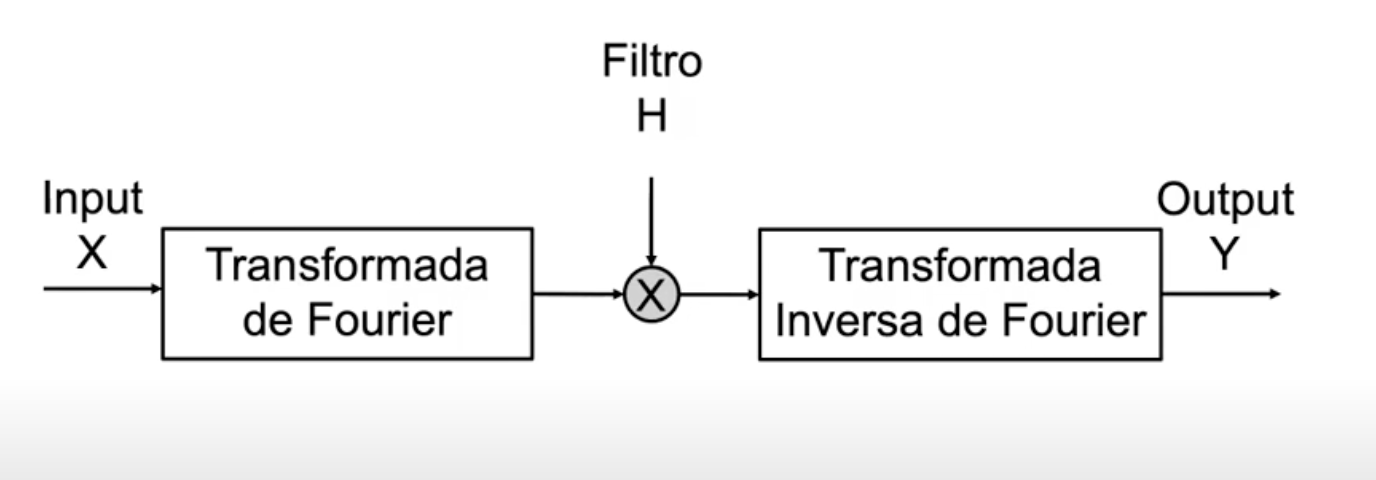

# Tipos de Filtros

**Paso bajo. Filtros suavizantes** :
Atenúan o eliminan las componentes de alta frecuencia en el dominio de
Fourier a la vez que dejan inalterables las bajas frecuencias (“deja pasar” las
frecuencias bajas).
- Filtro ideal de paso bajo
- Filtro Butterworth de paso bajo
- Filtro gaussiano de paso bajo

**Paso alto. Filtros de realce**:
Atenúan o eliminan las componentes de baja frecuencia en el dominio de
Fourier a la vez que dejan inalterables las altas frecuencias (“deja pasar” las
frecuencias altas).
- Filtro ideal de paso alto
- Filtro Butterworth de paso alto.
- Filtro gaussiano de paso alto.

**De banda:**
Elimina unas regiones elegidas de frecuencia intermedias. Restauración de
imágenes.
- Un filtro de banda atenúa las altas y bajas frecuencias, pero mantiene
intactas las frecuencias que se encuentren en una banda determinada.
- En el caso del filtro ideal, sólo deja pasar las frecuencias que están entre
dos frecuencias de corte.
- Se puede obtener un filtro de banda multiplicando uno de paso bajo por
uno de paso alto, en el que la frecuencia de corte del de paso bajo sea
superior a la del de paso alto.

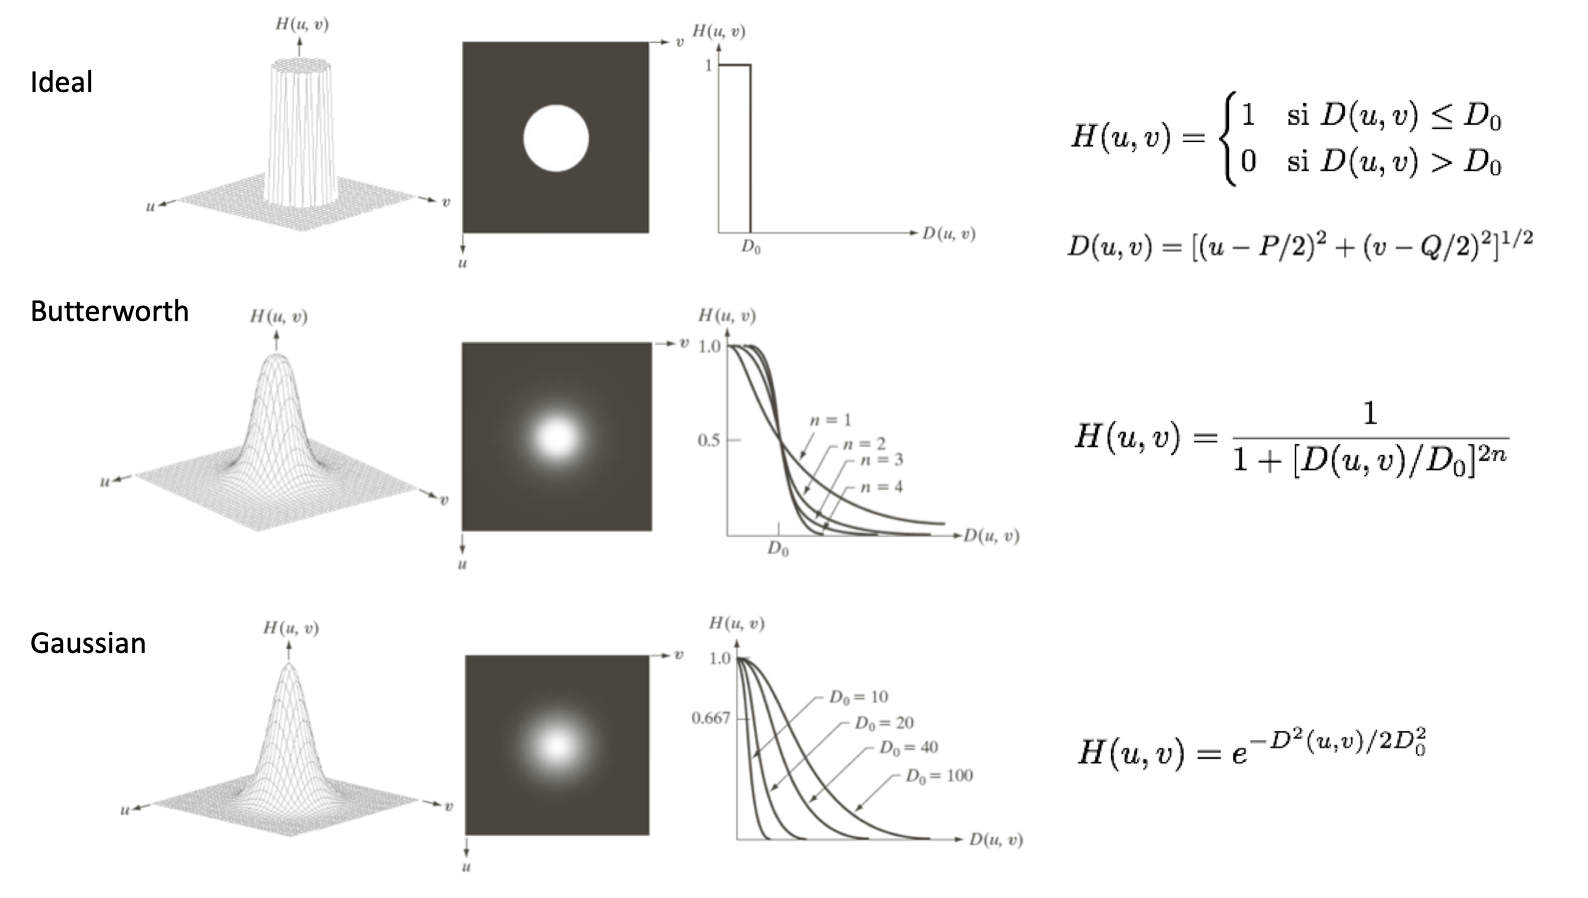

# Desarrollo

In [ ]:
# importar las librerías necesarias.

import cv2
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt,exp

In [ ]:
# cargar las imágenes

img1 = cv2.imread("1.png", 0)
img2 = cv2.imread("2.png", 0)
img3 = cv2.imread("3.png", 0)
img4 = cv2.imread("4.png", 0)
img5 = cv2.imread("5.png", 0)

In [ ]:
# Filtros

''' Código de las formulas que describen los tipos de filtros. El presente código es recuperado del siguiente autor:
        Chen, C. (2020). Digital Image Processing using Fourier Transform in Python. Recuperado de Medium.com:
        https://hicraigchen.medium.com/digital-image-processing-using-fourier-transform-in-python-bcb49424fd82
'''

def distance(point1,point2):
    return np.sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

def idealFilterLP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 1
    return base

def idealFilterHP(D0,imgShape):
    base = np.ones(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 0
    return base

def butterworthLP(D0,imgShape,n):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1/(1+(distance((y,x),center)/D0)**(2*n))
    return base

def butterworthHP(D0,imgShape,n):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1-1/(1+(distance((y,x),center)/D0)**(2*n))
    return base

def gaussianLP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = np.exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

def gaussianHP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1 - np.exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

## Imagen 1

Para la imagen1 se utilizó el filtro ideal pasa bajas, con una frecuencia de corte de 60. Estos parámetros se eligieron tras varios experimentos de prueba error, dejando los que se consideran eliminan mayor ruido de la imagen.

In [ ]:
# frecuencia de corte
Do = 60

In [ ]:
# aplicar la transformada de Fourier

original = np.fft.fft2(img1)
center = np.fft.fftshift(original)


# Elegimos el filtro

LowPass = idealFilterLP(Do,img1.shape)

LowPassCenter = center * idealFilterLP(Do,img1.shape)
LowPass = np.fft.ifftshift(LowPassCenter)
inverse_LowPass = np.fft.ifft2(LowPass)




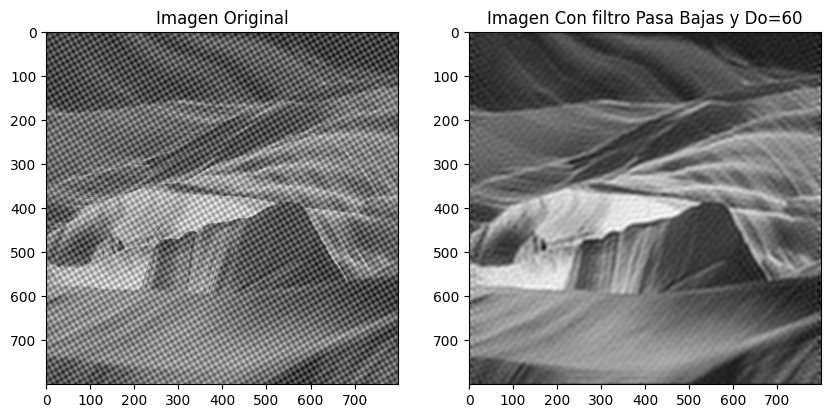

In [ ]:
# visualizamos los resultados

plt.figure(figsize=(10, 10), constrained_layout=False)

plt.subplot(121), plt.imshow(img1, "gray"), plt.title("Imagen Original")
plt.subplot(122), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Imagen Con filtro Pasa Bajas y Do=60")
plt.show()

## Imagen 2

Para la imagen2 se utilizó el filtro ButterWorth de Paso Alto, con una frecuencia de corte de 60 y un orden de 6. Estos parámetros se eligieron tras varios experimentos de prueba error, dejando los que se consideran eliminan mayor ruido de la imagen. Adicionalmente la imagen se puede mejorar aplicando un umbral para binarizar.

In [ ]:
# orden
n = 6

# frecuencia de corte
Do = 60

In [ ]:
original = np.fft.fft2(img2)
center = np.fft.fftshift(original)

HighPass = butterworthHP(Do,img2.shape,n)

HighPassCenter = center * butterworthHP(Do,img2.shape,n)
HighPass = np.fft.ifftshift(HighPassCenter)
inverse_HighPass = np.fft.ifft2(HighPass)

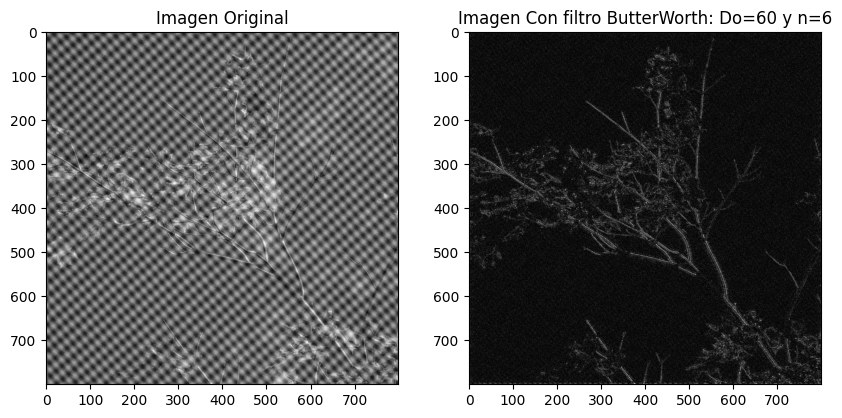

In [ ]:
# visualizamos los resultados

plt.figure(figsize=(10, 10), constrained_layout=False)

plt.subplot(121), plt.imshow(img2, "gray"), plt.title("Imagen Original")
plt.subplot(122), plt.imshow(np.abs(inverse_HighPass), "gray"), plt.title("Imagen Con filtro ButterWorth: Do=60 y n=6")
plt.show()

## Imagen 3

In [ ]:
n = 8  # Butterworth orther

# frecuencia de corte
Do = 80

In [ ]:
original = np.fft.fft2(img3)
center = np.fft.fftshift(original)

LowPass = idealFilterLP(Do,img3.shape)

LowPassCenter = center * idealFilterLP(Do,img3.shape)
LowPass = np.fft.ifftshift(LowPassCenter)
inverse_LowPass = np.fft.ifft2(LowPass)

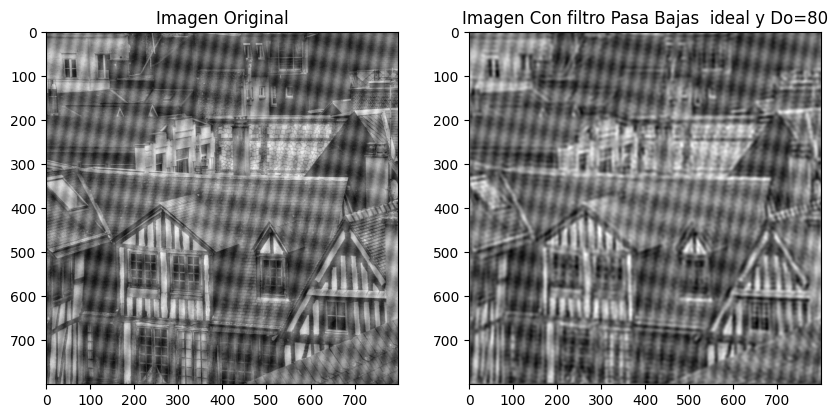

In [ ]:
# visualizamos los resultados

plt.figure(figsize=(10, 10), constrained_layout=False)

plt.subplot(121), plt.imshow(img3, "gray"), plt.title("Imagen Original")
plt.subplot(122), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Imagen Con filtro Pasa Bajas  ideal y Do=80")
plt.show()

## Imagen 4

Para la imagen4 se utilizó el filtro ideal de Paso Bajo, con una frecuencia de corte de 50. Estos parámetros se eligieron tras varios experimentos de prueba error, dejando los que se consideran eliminan mayor ruido de la imagen.

In [ ]:
# frecuencia de corte
Do = 50

In [ ]:
original = np.fft.fft2(img4)
center = np.fft.fftshift(original)

LowPass = idealFilterLP(Do,img4.shape)

LowPassCenter = center * idealFilterLP(Do,img4.shape)
LowPass = np.fft.ifftshift(LowPassCenter)
inverse_LowPass = np.fft.ifft2(LowPass)

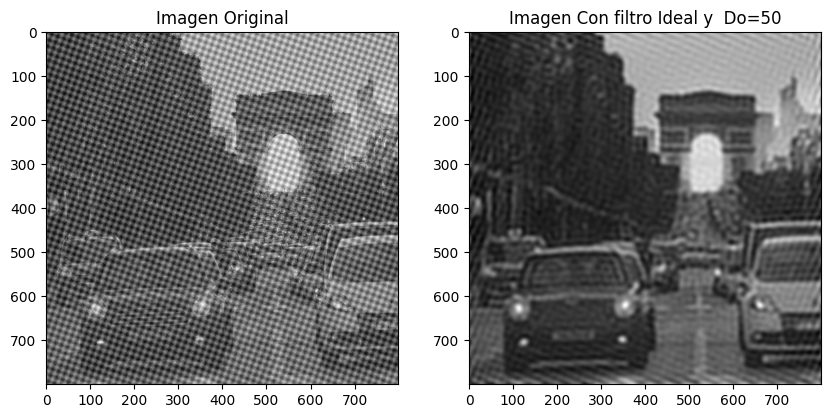

In [ ]:
# visualizamos los resultados

plt.figure(figsize=(10, 10), constrained_layout=False)

plt.subplot(121), plt.imshow(img4, "gray"), plt.title("Imagen Original")
plt.subplot(122), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Imagen Con filtro Ideal y  Do=50")
plt.show()

## Imagen 5

In [ ]:
# frecuencia de corte
Do = 35

In [ ]:
original = np.fft.fft2(img5)
center = np.fft.fftshift(original)
LowPass = gaussianLP(Do,img5.shape)
LowPassCenter = center * gaussianLP(Do,img5.shape)
LowPass = np.fft.ifftshift(LowPassCenter)
inverse_LowPass = np.fft.ifft2(LowPass)

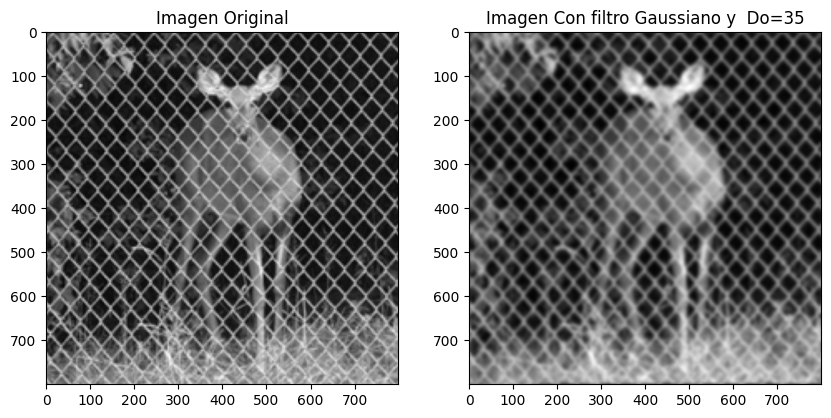

In [ ]:
# visualizamos los resultados

plt.figure(figsize=(10, 10), constrained_layout=False)

plt.subplot(121), plt.imshow(img5, "gray"), plt.title("Imagen Original")
plt.subplot(122), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Imagen Con filtro Gaussiano y  Do=35")
plt.show()

# Conclusiones

El presente trabajo me hizo entender el procedimiento en el dominio de la frecuencia. El cómo la transformada de Fourier tiene un papel importante en la tarea de reducción de ruido. Los distintos tipos de filtros que existen, así como tener una noción de cuando deben ser aplicados.

Pude comprender y estudiar a fondo estos conceptos, a pesar de que aún tengo algunas dudas específicas como por ejemplo en las imagenes 3 y 5, puedo decir que comprendo mejor el concepto general del proceso de la reducción de ruido.

# Bibliografía

[Domingo Mery]. (2020, October 8). 16 Procesamiento de Imágenes: Implementación de Filtros usando Fourier en 2D [Video]. YouTube. https://www.youtube.com/watch?v=5eA7HBzT6CM

R.C. González, R.E. Woods, Digital Image Processing, Pearson Prentice Hall, 2008

Chen, C. (2021, 13 diciembre). Digital Image Processing using Fourier Transform in Python. Medium. https://hicraigchen.medium.com/digital-image-processing-using-fourier-transform-in-python-bcb49424fd82